*Reference*: https://www.kaggle.com/irinahulea/covid-19-vaccination-progress-eda-predictions/
## Project Objectives
- What vaccines are used and in which countries?
- What country is vaccinated more people?
- What country is vaccinated a larger percent from its population?
- Make predictions about when countries will reach 25%, 50% and 70% of the population vaccination thresholds
- Attempt to work with live data from Google API

## Importing packages

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Importing and merging data

In [331]:
#reading in country vaccination data
vaccinations = pd.read_csv('country_vaccinations.csv')
vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.00,0.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.00,NaN,NaN,NaN,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.00,NaN,NaN,NaN,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.00,NaN,NaN,NaN,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.00,NaN,NaN,NaN,35.00,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [332]:
vaccinations.shape

(29412, 15)

In [333]:
#keeping useful columns and eliminating the rest
vaccinations = vaccinations[['date', 
                             'country', 
                             'iso_code', 
                             'daily_vaccinations', 
                             'people_vaccinated_per_hundred', 
                             'people_fully_vaccinated',
                             'vaccines',
                            ]]
vaccinations.head()

,date,country,iso_code,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines
0,2021-02-22,Afghanistan,AFG,NaN,0.00,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
1,2021-02-23,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
2,2021-02-24,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
3,2021-02-25,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
4,2021-02-26,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."


In [334]:
#checking for categorical NaN's
vaccinations.select_dtypes(include=['object']).isnull().sum()

date        0
country     0
iso_code    0
vaccines    0
dtype: int64

In [335]:
#fixing iso codes of UK countries
vaccinations.loc[vaccinations.country.isin(['England', 'Scotland', 'Wales', 'Northern Ireland']), 'iso_code'] = 'GBR'

In [336]:
#reading in continent data, with the intent of adding regional/sub-regional data
continents = pd.read_csv('continents2.csv')
continents.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.00,34.00,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.00,154.00,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.00,39.00,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.00,15.00,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.00,61.00,NaN


In [337]:
#merging regional/sub-regional data with country vaccinations data
#iso_code column of vaccinations corresponds to alpha-3 columsn of continents
data = vaccinations.merge(continents[['alpha-3', 'region', 'sub-region']],
                          how='left',
                          left_on = 'iso_code',
                          right_on = 'alpha-3',
                         ).drop(columns=['alpha-3'])
data.head()

,date,country,iso_code,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines,region,sub-region
0,2021-02-22,Afghanistan,AFG,NaN,0.00,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
1,2021-02-23,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
2,2021-02-24,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
3,2021-02-25,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
4,2021-02-26,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia


In [338]:
#renaming columns
#data.columns = ['date', 'country', 'iso_code', 'daily_vaccinations', 'people_vaccinated_per_hundred', 'vaccines', 
#                'continent', 'region']
data.rename(columns = {"region":"continent", "sub-region":"region"}, inplace=True)
data.head()

,date,country,iso_code,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines,continent,region
0,2021-02-22,Afghanistan,AFG,NaN,0.00,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
1,2021-02-23,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
2,2021-02-24,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
3,2021-02-25,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
4,2021-02-26,Afghanistan,AFG,1367.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia


In [339]:
#split the Americas into North America and South America, and rename Oceania into Australia and Oceania
data.continent.value_counts()

Europe      9354
Asia        6953
Americas    6260
Africa      5308
Oceania     1308
Name: continent, dtype: int64

In [340]:
data.loc[data.region == 'Northern America', 'continent'] = 'North America'
data.loc[data.region == 'Latin America and the Caribbean', 'continent'] = 'South America'

In [341]:
data.loc[data.continent == 'Oceania', 'continent'] = 'Australia and Oceania'

In [342]:
data.continent.value_counts()

Europe                   9354
Asia                     6953
South America            5520
Africa                   5308
Australia and Oceania    1308
North America             740
Name: continent, dtype: int64

In [343]:
#saving progress
data.to_pickle("vaccinations_merged.pkl")

## Dealing with missing values

In [344]:
data = pd.read_pickle("vaccinations_merged.pkl")

In [345]:
data.isnull().sum()

date                                 0
country                              0
iso_code                             0
daily_vaccinations                 241
people_vaccinated_per_hundred    13851
people_fully_vaccinated          16582
vaccines                             0
continent                          229
region                             229
dtype: int64

In [346]:
data.loc[data.continent.isnull(), 'iso_code'].value_counts()

OWID_CYN    134
OWID_KOS     95
Name: iso_code, dtype: int64

### Missing values: continent/region

In [347]:
#we're missing continent/region for Northern Cyprus and Kosovo.
data.loc[data.country == 'Northern Cyprus', 'continent'] = 'Europe'
data.loc[data.country == 'Northern Cyprus', 'region'] = 'Southern Europe'

data.loc[data.country == 'Kosovo', 'continent'] = 'Asia'
data.loc[data.country == 'Kosovo', 'region'] = 'Western Asia'

In [348]:
#missing values for continent/region have been eliminated.
data.isnull().sum()

date                                 0
country                              0
iso_code                             0
daily_vaccinations                 241
people_vaccinated_per_hundred    13851
people_fully_vaccinated          16582
vaccines                             0
continent                            0
region                               0
dtype: int64

### Missing values: daily_vaccinations

In [349]:
#since missing values for daily_vaccinations makes up a very small percentage of the data...
data.loc[data.daily_vaccinations.isnull()].shape[0] / data.shape[0]

0.008193934448524412

In [350]:
#I'm going to choose to delete those rows.
data = data[~data.daily_vaccinations.isnull()]

### Missing values: people_vaccinated_per_hundred

In [351]:
#people_vaccinated_per_hundred is more problematic, however. 
data.loc[data.people_vaccinated_per_hundred.isnull()].shape[0] / data.shape[0]

0.47410099070995165

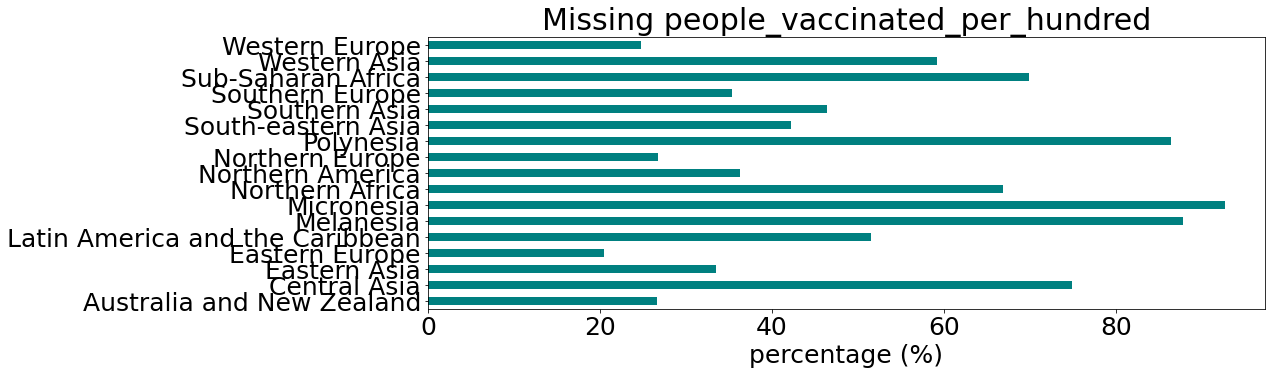

In [352]:
#visualizing percentage of missing people_vaccinated_per_hundred data by region
(data[data.people_vaccinated_per_hundred.isnull()].region.value_counts() / data.region.value_counts()
).mul(100).plot.barh(color="teal", figsize=(15,5))

plt.title('Missing people_vaccinated_per_hundred')
plt.xlabel('percentage (%)')
plt.show()

In [353]:
#for countries that have people_vaccinated_per_hundred data at some point, we'll replace its missing values with the most recent
data.sort_values(by='date', inplace=True)
all_countries = list(data.country.unique())

for country in all_countries:
    data.loc[data.country == country, 'people_vaccinated_per_hundred'] = \
    data.loc[data.country == country, 'people_vaccinated_per_hundred'].fillna(method='bfill').fillna(method='ffill')

In [354]:
#cool, we've eliminated all missing values for people_vaccinated_per_hundred,
#replacing them with the most recent data we could find
data.loc[data.people_vaccinated_per_hundred.isnull()].shape[0] / data.shape[0]

0.0

### Missing values: people_fully_vaccinated

In [355]:
#same treatment for people_fully_vaccinated
data.sort_values(by='date', inplace=True)
all_countries = list(data.country.unique())

for country in all_countries:
    data.loc[data.country == country, 'people_fully_vaccinated'] = \
    data.loc[data.country == country, 'people_fully_vaccinated'].fillna(method='bfill').fillna(method='ffill')

In [356]:
#we've narrowed missing people_fully_vaccinated values down to <4%. Since we're not going to take
#averages on this column, we can keep these remaining missing values.
data.loc[data.people_fully_vaccinated.isnull()].shape[0] / data.shape[0]

0.035549004147955164

In [357]:
data.isnull().sum()

date                                0
country                             0
iso_code                            0
daily_vaccinations                  0
people_vaccinated_per_hundred       0
people_fully_vaccinated          1037
vaccines                            0
continent                           0
region                              0
dtype: int64

In [358]:
#saving progress
data.to_pickle("vaccinations_cleaned.pkl")

## Data Analysis

In [359]:
data = pd.read_pickle("vaccinations_cleaned.pkl")

### Predicting population vaccination percentages using fbprophet time-series model

#defining a function to make a timeseries prediction
def fbprophet_predict_and_plot(data, region_column, region, vaccination_metric, 
                               min_date = '2020-12-13', max_date='2021-07-06', future_days=10, plot=True):
    df = data[(data[region_column] == region) & (data.date <= max_date) & (data.date >= min_date)]
    df = df[['date', vaccination_metric]]
    df.columns = ['ds', 'y']
    model = Prophet(interval_width = 0.95)
    model.fit(df)
    future = model.make_future_dataframe(periods=future_days)
    forecast = model.predict(future)
    if plot:
        fig = plot_plotly(model, forecast)
        fig.show()
    else:
        return forecast

#China, India, US, Indonesia, Pakistan
fbprophet_predict_and_plot(data = data, 
                           region_column = 'country',
                           region = 'United States',
                           vaccination_metric = 'people_vaccinated_per_hundred',
                           future_days = 70,
                          )

### Linear Regression

In [360]:
from sklearn.model_selection import train_test_split

In [361]:
#grab US-specific data
USdata = pd.DataFrame(data[data.country == "United States"])

In [362]:
import datetime

In [363]:
#USdata['date'] = pd.to_datetime(USdata.date, format="%Y-%m-%d")

#USdata['dateToInt'] = pd.to_datetime(USdata['date']).view(np.int64)
#USdata['dateToInt'] /= 10**(11)

#USdata['dateToInt'] = USdata['date'].apply(to_integer)

USdata['dateToInt'] = pd.to_datetime(USdata['date'])
USdata['dateToInt'] = USdata['dateToInt'].map(datetime.datetime.toordinal)

USdata.dtypes

date                              object
country                           object
iso_code                          object
daily_vaccinations               float64
people_vaccinated_per_hundred    float64
people_fully_vaccinated          float64
vaccines                          object
continent                         object
region                            object
dateToInt                          int64
dtype: object

In [364]:
def dateOf(k):
    return datetime.date.fromordinal(k)

In [365]:
USdata.tail()

,date,country,iso_code,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines,continent,region,dateToInt
28307,2021-07-02,United States,USA,1087156.00,54.31,156255896.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech",North America,Northern America,737973
28308,2021-07-03,United States,USA,1121064.00,54.45,156982549.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech",North America,Northern America,737974
28309,2021-07-04,United States,USA,1039561.00,54.54,157323738.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech",North America,Northern America,737975
28310,2021-07-05,United States,USA,927847.00,54.63,157636088.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech",North America,Northern America,737976
28311,2021-07-06,United States,USA,865929.00,54.63,157636088.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech",North America,Northern America,737977


In [366]:
train, test = \
train_test_split(USdata, test_size=0.2, shuffle=False)

In [367]:
train.tail()

,date,country,iso_code,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines,continent,region,dateToInt
28267,2021-05-23,United States,USA,1827882.00,48.83,130014175.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech",North America,Northern America,737933
28268,2021-05-24,United States,USA,1782714.00,49.01,130615797.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech",North America,Northern America,737934
28269,2021-05-25,United States,USA,1750524.00,49.15,131078608.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech",North America,Northern America,737935
28270,2021-05-26,United States,USA,1703162.00,49.36,131850089.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech",North America,Northern America,737936
28271,2021-05-27,United States,USA,1618194.00,49.55,132769894.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech",North America,Northern America,737937


In [368]:
dateOf(737937) #train/test split at May 27-28 2021

datetime.date(2021, 5, 27)

In [369]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [370]:
#fit date against people_vaccinated_per_hundred
model.fit(X=train[['dateToInt']],y=train[['people_vaccinated_per_hundred']])

LinearRegression()

In [371]:
model.intercept_

array([-264623.99891263])

In [372]:
model.coef_

array([[0.35866787]])

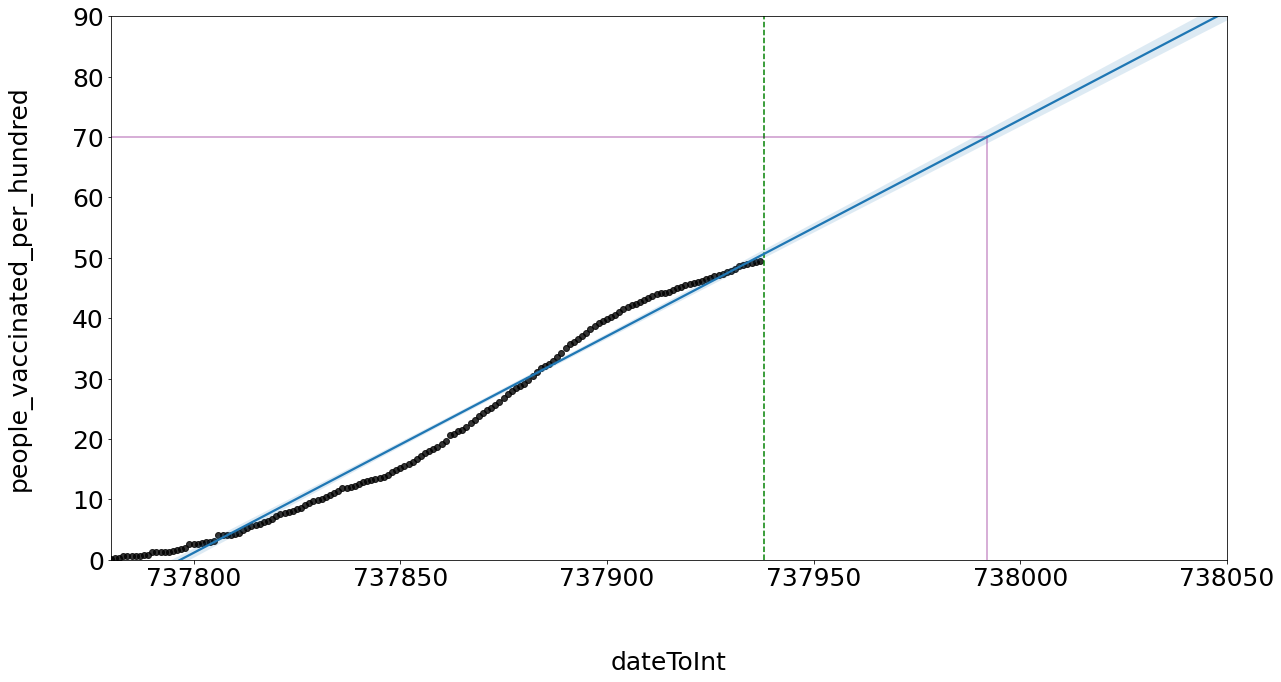

In [373]:
plt.figure(figsize=(20, 10))
plt.xlim(737780,738050)
plt.ylim(0,90)
plt.axvline(737938, color='green',linestyle='--')
plt.axvline(737992, ymax=0.78, color='purple',alpha=150)
plt.axhline(70, color='purple', xmax=0.785, alpha=150)
ax.set_xlim(738050)
plt.rcParams.update({'font.size': 25})
plot = sns.regplot(x=train[['dateToInt']], y=train['people_vaccinated_per_hundred'], 
                   scatter_kws={'color': 'black'}, truncate=False)
plot.yaxis.labelpad,plot.xaxis.labelpad = 40,60


y_pred = model.predict(np.asarray(USdata[["dateToInt"]]).reshape(-1, 1))
USdata['pred'] = y_pred

ax = USdata.plot(x='dateToInt', y='people_vaccinated_per_hundred', color='black', style='.')
USdata.plot(x='dateToInt', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5)
ax.set_title('My Title')
ax.set_xlabel('Date')
ax.set_ylabel('people_vaccinated_per_hundred')

plt.show()
#locs,labels = plt.xticks()

### Linear Regression math & eval

In [374]:
#70 = model.intercept_ + model.coef_*Date
(70 - model.intercept_)/model.coef_ #rounds to 737992

array([[737991.95215583]])

In [375]:
dateOf(737992)

datetime.date(2021, 7, 21)

In [376]:
y_pred = model.predict(test[['dateToInt']])
y_pred = y_pred.flatten()
y_pred

array([50.64909538, 51.00776325, 51.36643111, 51.72509898, 52.08376685,
       52.44243471, 52.80110258, 53.15977045, 53.51843831, 53.87710618,
       54.23577404, 54.59444191, 54.95310978, 55.31177764, 55.67044551,
       56.02911338, 56.38778124, 56.74644911, 57.10511698, 57.46378484,
       57.82245271, 58.18112057, 58.53978844, 58.89845631, 59.25712417,
       59.61579204, 59.97445991, 60.33312777, 60.69179564, 61.05046351,
       61.40913137, 61.76779924, 62.12646711, 62.48513497, 62.84380284,
       63.2024707 , 63.56113857, 63.91980644, 64.2784743 , 64.63714217])

In [377]:
pred=pd.DataFrame( {'actual':test['people_vaccinated_per_hundred'], 'predicted':y_pred})
pred['residual'] = pred.actual - pred.predicted

pred

,actual,predicted,residual
28272,49.75,50.65,-0.90
28273,49.98,51.01,-1.03
28274,50.15,51.37,-1.22
28275,50.38,51.73,-1.35
28276,50.38,52.08,-1.70
28277,50.45,52.44,-1.99
28278,50.56,52.80,-2.24
28279,50.75,53.16,-2.41
28280,50.91,53.52,-2.61
28281,51.08,53.88,-2.80


In [378]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [379]:
mean_squared_error(y_true=test['people_vaccinated_per_hundred'], y_pred=y_pred)

35.11620866946616

In [380]:
mean_absolute_error(y_true=test['people_vaccinated_per_hundred'], y_pred=y_pred)

5.276618775263428

In [384]:
r2_score(y_true=test['people_vaccinated_per_hundred'], y_pred=y_pred)

-15.770056329005648

???????????

In [385]:
RSS,TSS=0,0

#Manual R2-Score
for i in pred['residual']:
    RSS += i**2

for i in pred['actual']:
    TSS += i**2
    
1-RSS/TSS

0.9872041534272916